<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta

import os
import re

from functools import reduce
from collections import defaultdict

# Customer Analysis

In [2]:
os.listdir()

['.config',
 '1_order_payments_dataset.csv',
 '1_customers_dataset.csv',
 'online_retail_II.xlsx',
 'mall_customers.csv',
 'match_result_test.csv',
 'scanner_data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'mock_sales_data.csv',
 'bz_data_analyis.csv',
 'ecommerce-data.csv',
 '1_orders_dataset.csv',
 'test.csv',
 'groceries.csv',
 'sample-sales-data.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'online_retail.xlsx',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sales_vs_discount.csv',
 'sales_data_with_stores.csv',
 'sales.csv',
 'sample_data']

In [4]:
df = pd.read_csv('sample-sales-data.csv')
df.sales_date = df.sales_date.to_numpy().astype('datetime64[D]')
df.head()

,store,product,sales_date,sales_qty,sales_rev
0,1,29790057,2020-03-19,4,42.0
1,2,29790057,2020-03-18,1,10.5
2,3,29790057,2020-03-16,8,84.0
3,4,29790057,2020-03-16,15,157.5
4,5,29790057,2020-03-17,28,294.0


In [34]:
cnt = df.groupby(['product'])['sales_qty'].sum().reset_index().sort_values(['sales_qty'], ascending = 0)
cnt = cnt.assign(ratio = [round(a/np.sum(cnt.sales_qty)*100,2) for a in cnt.sales_qty])
cnt['product2'] = [str(b)  if a >= 1 else 'etc' for a, b in zip(cnt['ratio'], cnt['product'])] 
cnt.head()
list_product = dict(zip(cnt['product'], cnt['product2']))

In [35]:
df['product2'] = df['product'].apply(lambda x : list_product.get(x,x))
df.head()

,store,product,sales_date,sales_qty,sales_rev,product2
0,1,29790057,2020-03-19,4,42.0,etc
1,2,29790057,2020-03-18,1,10.5,etc
2,3,29790057,2020-03-16,8,84.0,etc
3,4,29790057,2020-03-16,15,157.5,etc
4,5,29790057,2020-03-17,28,294.0,etc


In [36]:
df2 = df.groupby(['store', 'product2', 'sales_date'])['sales_qty', 'sales_rev'].sum().reset_index()
df2.head()

<ipython-input-36-49ad45d844eb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,store,product2,sales_date,sales_qty,sales_rev
0,1,30552121,2019-12-30,9,206.1
1,1,30552121,2019-12-31,5,114.5
2,1,30552121,2020-01-01,7,160.3
3,1,30552121,2020-01-02,16,366.4
4,1,30552121,2020-01-03,7,160.3


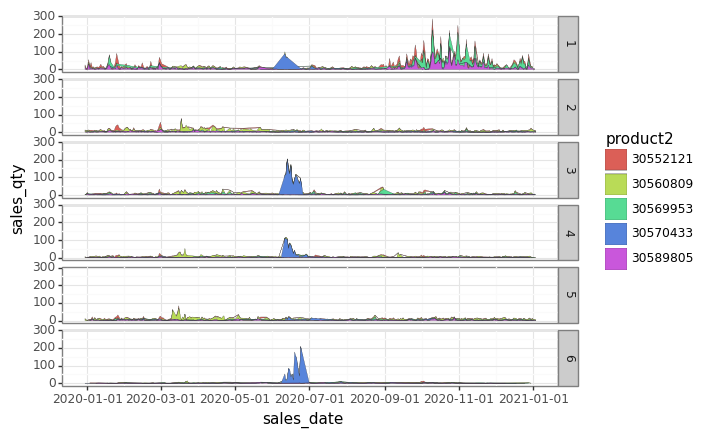

<ggplot: (8736126164505)>

In [41]:
(
    ggplot(df2[df2['product2'] != 'etc'], aes('sales_date', 'sales_qty', fill = 'product2')) +
    gg.geom_area(color = '#333333', size = .1) +
    gg.facet_grid('store~') +
    gg.theme_bw()
)

# Iterators

In [42]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [43]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}